In [1]:
from astropy.io import fits
from scipy import ndimage
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from pbga import PBGA

In [2]:
path = "C:/Users/pavan/Projects/Capstone/Tobin_Data/"
file = fits.open(path+"HH270VLA1_cont_robust0.5.pbcor.fits")
image = file[0].data[0,0,:,:]
std = np.std(image)
image[image<std*3] = 0

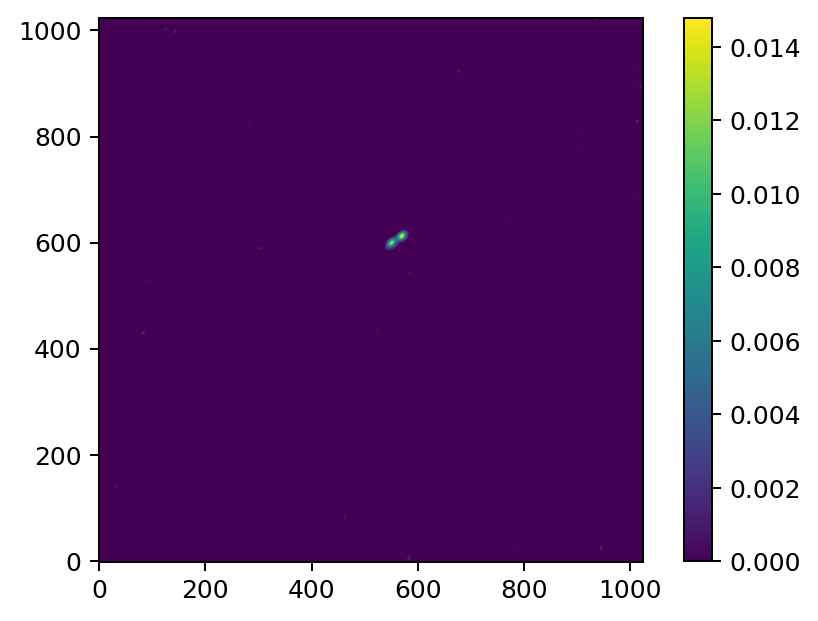

In [3]:
plt.figure(dpi=180)
plt.imshow(image, origin='lower')
plt.colorbar()

In [4]:
pbga = PBGA(buffer_size=10, group_size=80)
pbga.run(image)

In [5]:
group_ranges = pbga.group_ranges
group_data = pbga.group_data
group_stats = pbga.group_stats

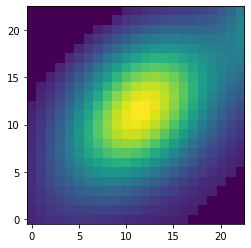

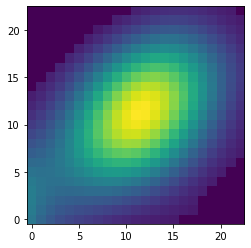

In [6]:
for data_ in group_data:
    plt.imshow(data_['IMAGE'], origin='lower')
    plt.show()

In [7]:
group_stats

[{'X_BAR': 550.8409173858773,
  'Y_BAR': 598.3968287158741,
  'COV_MAT': array([[27.49873456, 10.58845065],
         [10.58845065, 26.40380379]]),
  'RHO': 0.3929549954672338,
  'EIG_VALUES': array([37.55386346, 16.34867489]),
  'EIG_VECTORS': array([[ 0.72513276, -0.68860909],
         [ 0.68860909,  0.72513276]]),
  'X_LEN': 39.89709632822367,
  'Y_LEN': 26.324204538303107,
  'RAD': 0.759569157076443},
 {'X_BAR': 568.8968468752731,
  'Y_BAR': 610.6031339192008,
  'COV_MAT': array([[27.48798815, 10.78497212],
         [10.78497212, 25.21940224]]),
  'RHO': 0.4096190585540065,
  'EIG_VALUES': array([37.19815204, 15.50923835]),
  'EIG_VECTORS': array([[ 0.74316774, -0.66910516],
         [ 0.66910516,  0.74316774]]),
  'X_LEN': 39.70769345441751,
  'Y_LEN': 25.63948001308737,
  'RAD': 0.7330040465576634}]

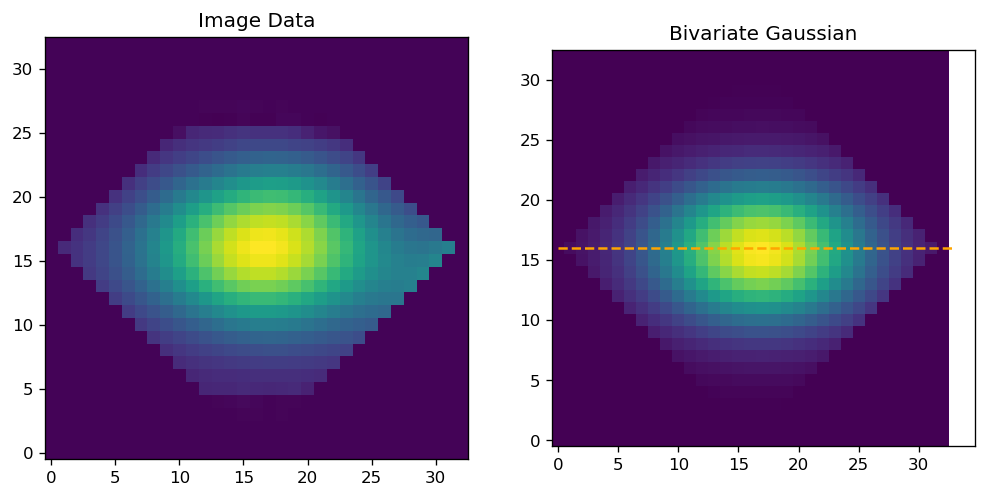

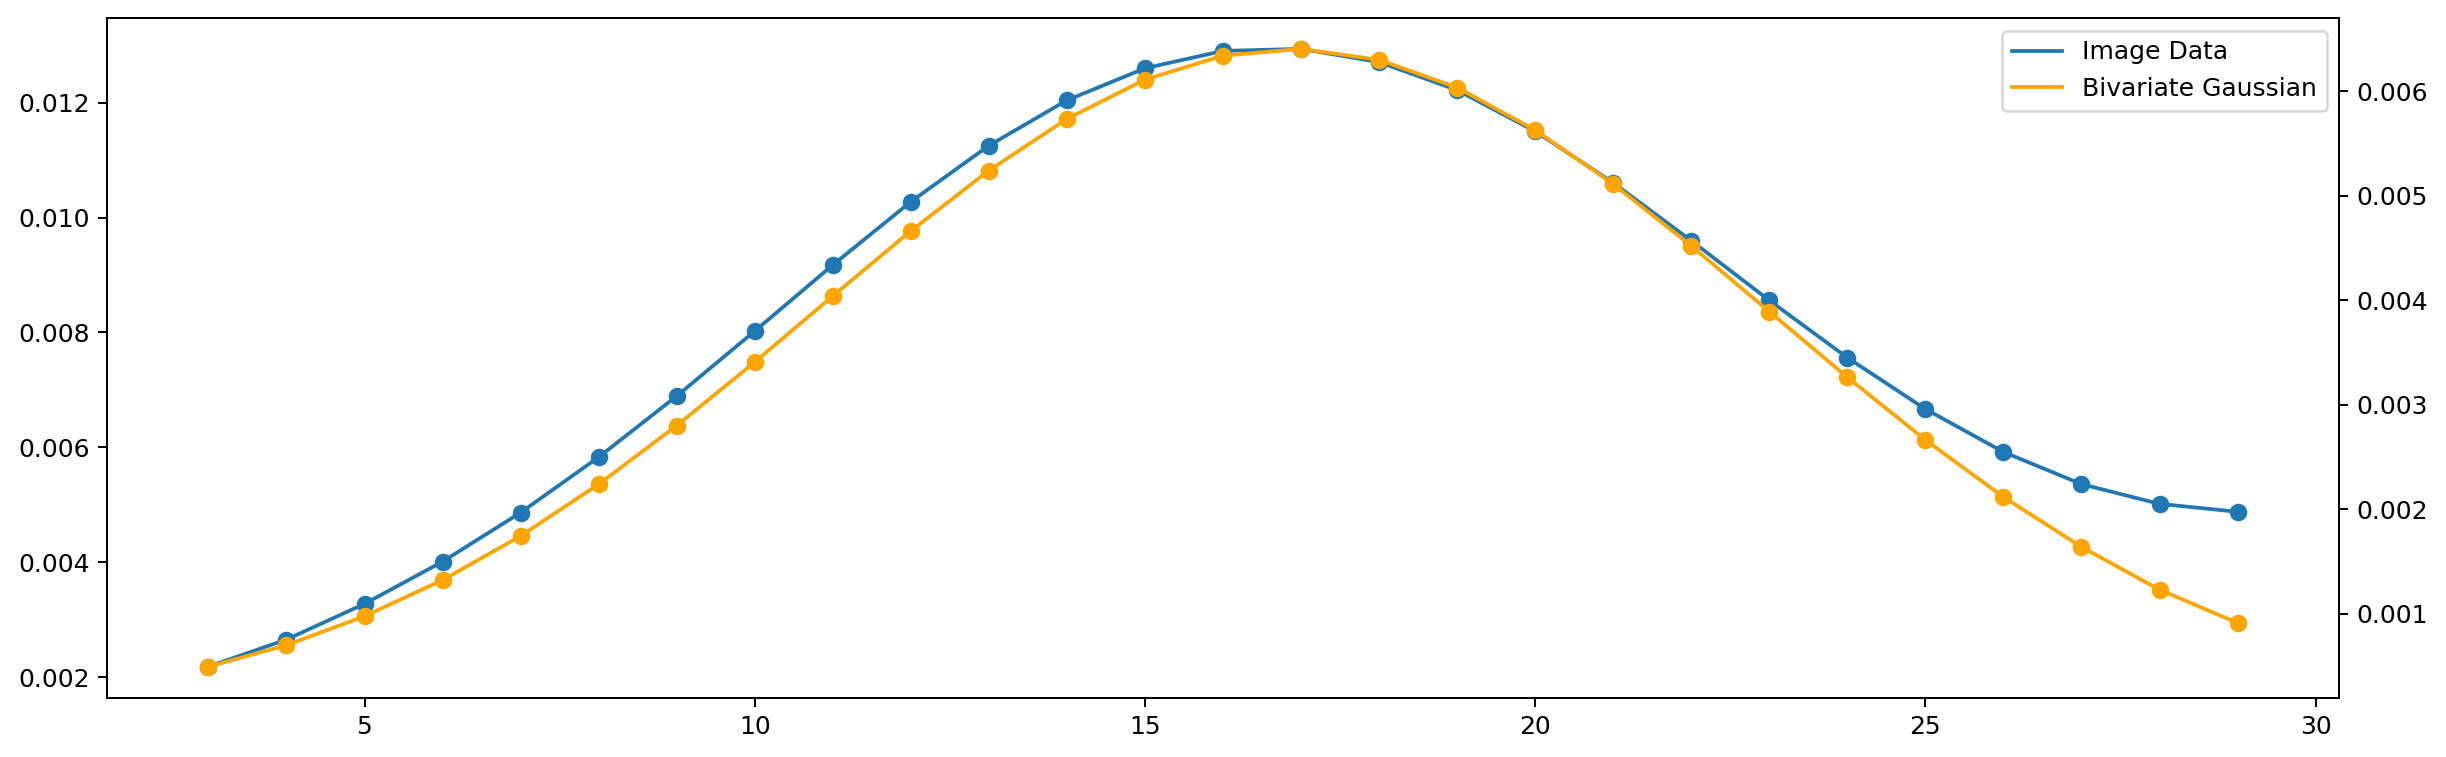

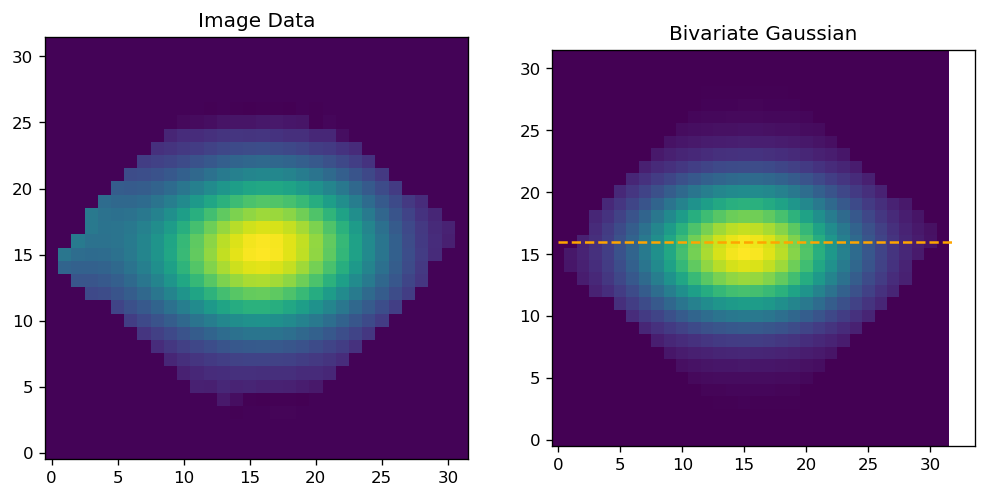

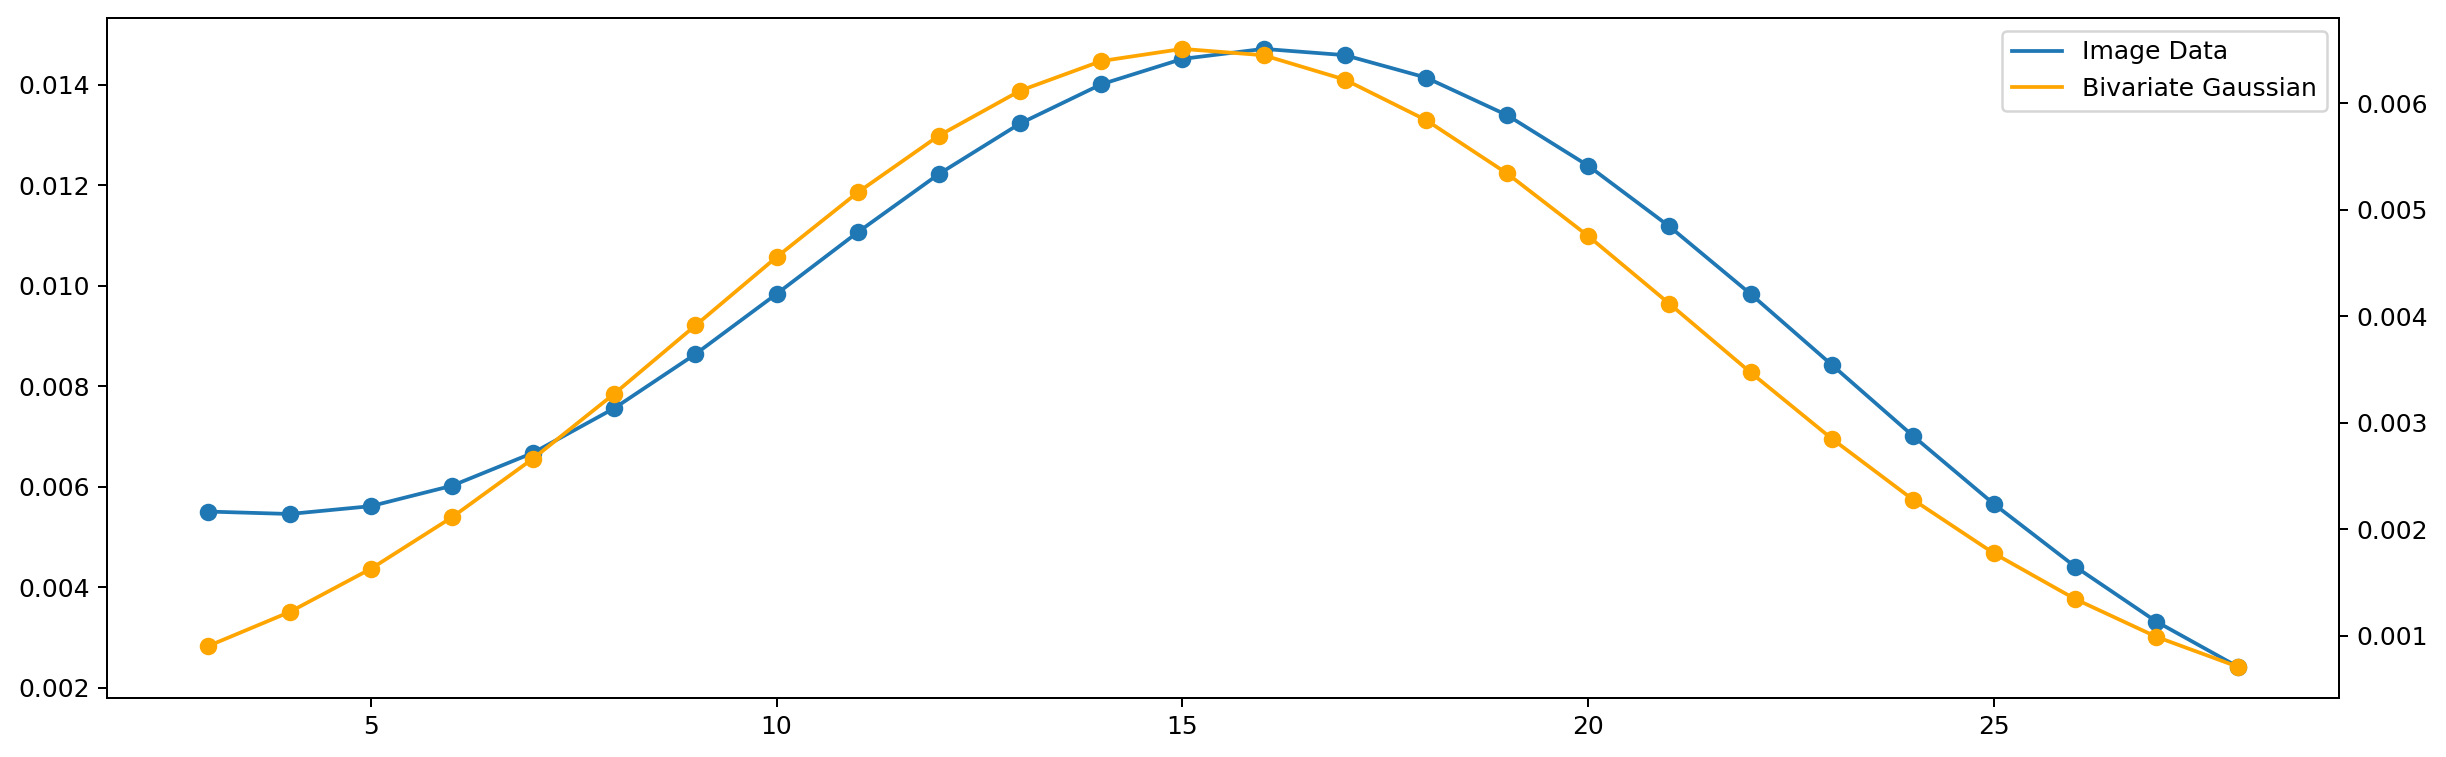

In [8]:
for range_, data_, stats_ in zip(group_ranges, group_data, group_stats):
    
    rv = stats.multivariate_normal([stats_['X_BAR'], stats_['Y_BAR']], stats_['COV_MAT'])
    pos = np.dstack((data_['X'], data_['Y']))
    bvg = rv.pdf(pos)

    r = ndimage.rotate(data_['IMAGE'], np.degrees(stats_['RAD']))
    rf = ndimage.rotate(bvg, np.degrees(stats_['RAD']))
       
    n_rows = r.shape[0]
    n_cols = r.shape[1]
    mid = n_rows//2
#     mid = 45
    
    plt.figure(figsize=(10, 5), dpi=120)
    plt.subplot(1, 2, 1)
    plt.imshow(r, origin='lower')
    plt.title('Image Data')
#     plt.hlines(y=mid, xmin=0, xmax=n_rows, linestyles='dashed')
    plt.subplot(1, 2, 2)
    plt.imshow(rf, origin='lower')
    plt.title('Bivariate Gaussian')
    plt.hlines(y=mid, xmin=0, xmax=n_rows, linestyles='dashed', color='orange')
    plt.show()
    
    y = np.array([r[mid, c] for c in range(n_cols)])
    y_ = np.array([rf[mid, c] for c in range(n_cols)])
    x = np.arange(0, len(y), 1)
    
    trim = int(len(y) * 0.10)
    y = y[trim:len(y) - trim]
    y_ = y_[trim:len(y_) - trim]
    x = x[trim:len(x) - trim]
    
    fig, ax1 = plt.subplots(figsize=(16, 5), dpi=180)
    ax1.plot(x, y, label='Image Data')
    ax1.scatter(x, y)
    
    ax2 = ax1.twinx()
    ax2.plot(x, y_, color='orange', label='Bivariate Gaussian')
    ax2.scatter(x, y_, color='orange')
    
    fig.legend( bbox_to_anchor=(0.9, 0.88))
    plt.show()